In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import os
import pickle

import SAM
import float_data as flt

import importlib
importlib.reload(SAM)
importlib.reload(flt)

from dask import delayed

In [3]:
ids = ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2']
model_folder = 'model'
BICs = {}
for m_id in ids:
    
    print('Starting {}'.format(m_id))
    bic = np.zeros(30)
    for n_classes in range(2, 30):
        
        path_n = '{}/{}/{}'.format(model_folder, m_id, n_classes)
        
        if os.path.exists('{}/bic.obj'.format(path_n)):
            with open('{}/bic.obj'.format(path_n), 'rb') as file:
                bic[n_classes] = pickle.load(file)
                file.close()
            continue
        print('Finished {} with {} classes'.format(m_id, n_classes))
    BICs[m_id] = bic
print('Done!')

Starting r1i1p1f2
Starting r2i1p1f2
Starting r3i1p1f2
Done!


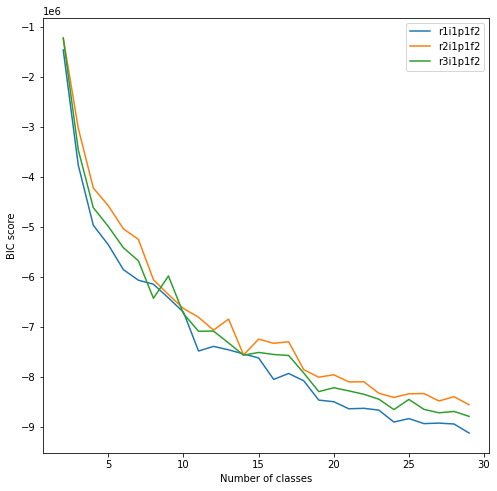

In [4]:
fig, ax = plt.subplots()
for m_id in ids:
    ax.plot(np.arange(2, np.size(BICs[m_id])), BICs[m_id][2:], label=m_id)
fig.set_size_inches(8, 8)
ax.legend()
ax.set_xlabel('Number of classes')
ax.set_ylabel('BIC score')
plt.savefig('figures/BIC-{}'.format(model_folder), dpi=300, bbox_inches='tight')